# Week 10.3.2 Generating word embeddings using Gensim Word2Vec

## Word embeddings and Word2Vec

In [1]:
# imports needed and logging
import gzip
import gensim 
import logging
 
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
 

## Dataset

The small sample of GSWA dataset.

In [2]:
data_file="./data/wamex_xml.zip"

import zipfile
import json
# Import Dataset

data = list()
with zipfile.ZipFile(data_file, "r") as z:
    #df = [pd.read_json(filename) for filename in z.namelist()]
    print(len(z.namelist()))
    for filename in z.namelist():
        # print(filename)
        # df = pd.read_json(filename)
        with z.open(filename) as f:
            # load the json file
            # The resulting `content` is a list
            content = json.loads(f.read()) 
            # Convert content to a string   
            content = "".join(content)
            # Add to the data list
            data.append(content)
            

#data.pop(0)
print(data[:1])

1135
['Combined Reporting Application Pending Status: Sheet 1:250 000: Kalgoorlie (SH 51-09) Sheet 1:100 000: Kalgoorlie (3136) Project Operator: Cazaly Resources Limited Author: M Watts Date: September 2006 Distribution: 1.Department of Industry and Resources 2.Cazaly Resources Limited Cazaly Resources Limited September 2006 2 Figure 2: Castle Hill Project Tenement Location Plan, 1: 75 000 scale 6 Figure 3: Regional Geology with Exploration Index Map, 1:75 000 scale 8Cazaly Resources Limited September 2006 3 1.0 SUMMARY The Combined Mineral Exploration Report on the Castle Hill Project details exploration activities undertaken by Cazaly Resources Limited during the reporting period from 7 July 2005 to 6 July 2006.The reporting group known as Castle Hill comprises nine granted prospecting licences.The project area covers some 1250 hectares.Cazaly is the registered holder of the Castle Hill Project tenements.Cazalys exploration activities during the reporting period have been directed t

In [3]:
def read_input(input_file):
    """This method reads the input file which is in zip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
   # with gzip.open (input_file, 'rb') as f:
   #     for i, line in enumerate (f): 

   #         if (i%10000==0):
   #             logging.info ("read {0} reviews".format (i))
   #         # do some pre-processing and return a list of words for each review text
   #         yield gensim.utils.simple_preprocess (line)
    
   

    data = list()
    with zipfile.ZipFile(input_file, "r") as z:
    #df = [pd.read_json(filename) for filename in z.namelist()]
        print(len(z.namelist()))
        for i, filename in enumerate(z.namelist()):
            # print(filename)
            # df = pd.read_json(filename)
            if (i%100==0):
                logging.info ("read {0} reports".format (i))
            with z.open(filename) as f:
                # load the json file
                # The resulting `content` is a list
                content = json.loads(f.read()) 
                # Convert content to a string   
                content = "".join(content)
                if len(content) >= 10:
                    # Add to the data list
                    yield gensim.utils.simple_preprocess (content)
                else:
                    logging.info ("removed {0} because of small size".format (filename))
            

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list (read_input (data_file))
logging.info ("Done reading data file")

2018-11-17 15:42:02,730 : INFO : reading file ./data/wamex_xml.zip...this may take a while
2018-11-17 15:42:02,748 : INFO : read 0 reports
2018-11-17 15:42:02,752 : INFO : removed a073351_a73351_16166749.json because of small size
2018-11-17 15:42:02,778 : INFO : removed a071095_a71095_14949032.json because of small size
2018-11-17 15:42:02,779 : INFO : removed a071096_a71096_14966153.json because of small size
2018-11-17 15:42:02,790 : INFO : removed a71566_a71566.json because of small size
2018-11-17 15:42:02,792 : INFO : removed a071595_a71595_16384226.json because of small size
2018-11-17 15:42:02,792 : INFO : removed a071598_a71598_16486759.json because of small size
2018-11-17 15:42:02,800 : INFO : removed a071627_a71627_16546786.json because of small size
2018-11-17 15:42:02,806 : INFO : removed a071641_verification lis tnw area 2005_16770850.json because of small size
2018-11-17 15:42:02,807 : INFO : removed a071642_a71642_16670806.json because of small size
2018-11-17 15:42:02

1135


2018-11-17 15:42:02,935 : INFO : removed a071801_a71801_15143983.json because of small size
2018-11-17 15:42:02,936 : INFO : removed a071801_a71801_17018831.json because of small size
2018-11-17 15:42:02,936 : INFO : removed a071808_a71808_15913542.json because of small size
2018-11-17 15:42:02,937 : INFO : removed a071811_a71811_15868928.json because of small size
2018-11-17 15:42:02,974 : INFO : removed a071847_m04_161162 location plan_17599975.json because of small size
2018-11-17 15:42:02,975 : INFO : removed a071849_esp_305_002b_12512962.json because of small size
2018-11-17 15:42:02,987 : INFO : removed a071854_a71854_16039280.json because of small size
2018-11-17 15:42:02,987 : INFO : removed a071860_intermingeol codes_15840037.json because of small size
2018-11-17 15:42:02,993 : INFO : removed a071864_a71864_16040327.json because of small size
2018-11-17 15:42:03,022 : INFO : removed a071876_doir_vlist_mayfield_annrpt_mar05_17328942.json because of small size
2018-11-17 15:42:0

In [4]:
print(documents[:1])

[['combined', 'reporting', 'application', 'pending', 'status', 'sheet', 'kalgoorlie', 'sh', 'sheet', 'kalgoorlie', 'project', 'operator', 'cazaly', 'resources', 'limited', 'author', 'watts', 'date', 'september', 'distribution', 'department', 'of', 'industry', 'and', 'resources', 'cazaly', 'resources', 'limited', 'cazaly', 'resources', 'limited', 'september', 'figure', 'castle', 'hill', 'project', 'tenement', 'location', 'plan', 'scale', 'figure', 'regional', 'geology', 'with', 'exploration', 'index', 'map', 'scale', 'cazaly', 'resources', 'limited', 'september', 'summary', 'the', 'combined', 'mineral', 'exploration', 'report', 'on', 'the', 'castle', 'hill', 'project', 'details', 'exploration', 'activities', 'undertaken', 'by', 'cazaly', 'resources', 'limited', 'during', 'the', 'reporting', 'period', 'from', 'july', 'to', 'july', 'the', 'reporting', 'group', 'known', 'as', 'castle', 'hill', 'comprises', 'nine', 'granted', 'prospecting', 'licences', 'the', 'project', 'area', 'covers', 's

## Understanding some of the parameters

To train the model earlier, we had to set some parameters. Now, let's try to understand what some of them mean. For reference, this is the command that we used to train the model.

`model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)`

#### size
The size of the dense vector to represent each token or word. If you have very limited data, then size should be a much smaller value. If you have lots of data, its good to experiment with various sizes. A value of 100-150 has worked well for me.

#### window
The maximum distance between the target word and its neighboring word. If your neighbor's position is greater than the maximum window width to the left and the right, then, some neighbors are not considered as being related to the target word. In theory, a smaller window should give you terms that are more related. If you have lots of data, then the window size should not matter too much, as long as its a decent sized window.

#### min_count
Minimium frequency count of words. The model would ignore words that do not statisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model.

#### workers
How many threads to use behind the scenes?

In [5]:
import nltk

## >>> import nltk
## >>> nltk.download('averaged_perceptron_tagger')
## Incorporate part of speech tagging - gold becomes goldNN
# documents_w_pos = [nltk.pos_tag(d) for d in documents]
# documents = [[tup[0]+tup[1] for tup in d] for d in documents_w_pos]


phrases = gensim.models.Phrases(documents, min_count=1, threshold=1)
bigrams = gensim.models.phrases.Phraser(phrases)

model = gensim.models.Word2Vec (bigrams[documents], size=50, window=10, min_count=2, workers=12)
model.train(bigrams[documents],total_examples=len(documents),epochs=10)

2018-11-17 15:42:07,676 : INFO : collecting all words and their counts
2018-11-17 15:42:07,677 : INFO : PROGRESS: at sentence #0, processed 0 words and 0 word types
2018-11-17 15:42:12,590 : INFO : collected 606238 word types from a corpus of 2745037 words (unigram + bigrams) and 858 sentences
2018-11-17 15:42:12,591 : INFO : using 606238 counts as vocab in Phrases<0 vocab, min_count=1, threshold=1, max_vocab_size=40000000>
2018-11-17 15:42:12,592 : INFO : source_vocab length 606238
2018-11-17 15:42:15,004 : INFO : Phraser added 50000 phrasegrams
2018-11-17 15:42:17,931 : INFO : Phraser added 100000 phrasegrams
2018-11-17 15:42:22,350 : INFO : Phraser added 150000 phrasegrams
2018-11-17 15:42:22,386 : INFO : Phraser built with 150170 150170 phrasegrams
2018-11-17 15:42:22,387 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-11-17 15:42:22,387 : INFO : collecting all words and their counts
2018-11-17 15:42:22,390 : INFO : PROGRESS: at sentence #0, 

(12781137, 17556090)

# Looking at outputs

In [6]:
print(list(model.wv.vocab.keys())[:1000])

['combined_reporting', 'application_pending', 'status_sheet', 'kalgoorlie_sh', 'sheet_kalgoorlie', 'project_operator', 'cazaly_resources', 'limited_author', 'watts_date', 'september_distribution', 'department_of', 'industry_and', 'resources_cazaly', 'resources_limited', 'limited_september', 'figure', 'castle_hill', 'project_tenement', 'location_plan', 'scale_figure', 'regional_geology', 'with', 'exploration_index', 'map_scale', 'summary', 'the', 'combined_mineral', 'exploration_report', 'on_the', 'project_details', 'exploration_activities', 'undertaken_by', 'limited', 'during_the', 'reporting_period', 'from', 'july_to', 'july', 'the_reporting', 'group_known', 'as_castle', 'hill_comprises', 'nine_granted', 'prospecting_licences', 'project_area', 'covers_some', 'hectares_cazaly', 'is', 'registered_holder', 'of_the', 'project_tenements', 'cazalys_exploration', 'activities_during', 'period', 'have_been', 'directed_towards', 'the_acquisition', 'of', 'available_reports', 'and', 'datasets_rel

In [7]:
print(model.wv['gold'])

[ -3.1083124   -4.2537317  -11.644274    -3.8270316   -4.0507364
   8.1586895    3.5143259   -3.2121067   -3.683361    -1.1844169
   1.7872405    3.4484477   -2.0662415    0.70839727  -7.4772024
   5.1448655   -2.6539133   -2.506107   -12.404074    -6.632541
   1.8837969   -2.785855    -1.5712374   -5.0693455   -1.4763737
  -6.797384    -4.2100506   -1.3255721   -0.522061     2.1699443
   0.6827273   -0.4974436    5.122606     1.3225192    6.005966
  -1.8615868    9.102558    -8.922286    -9.757412    -3.2414882
  -0.5920079   -1.3107599    6.3102164    1.8380655   -5.713254
   1.762358     2.354302    -0.47442874 -13.380808     6.257552  ]


In [8]:
w1 = "gold"
model.wv.most_similar (positive=w1)

2018-11-17 15:44:32,969 : INFO : precomputing L2-norms of word weight vectors


[('nickel', 0.8037216663360596),
 ('copper', 0.7815126180648804),
 ('lead', 0.7808302044868469),
 ('au', 0.7414231300354004),
 ('discovered_at', 0.6960502862930298),
 ('platinum', 0.671017587184906),
 ('significant_gold', 0.6697643995285034),
 ('production_from', 0.6644235849380493),
 ('silver', 0.6531449556350708),
 ('and_zinc', 0.6321929097175598)]

In [9]:
# look up top 6 words similar to 'polite'
w1 = ["iron"]
model.wv.most_similar (positive=w1,topn=6)

[('sulphur', 0.8122290372848511),
 ('fe', 0.7873108386993408),
 ('silver', 0.7845513820648193),
 ('ores', 0.7717555165290833),
 ('free_milling', 0.7616594433784485),
 ('co', 0.7567967772483826)]

In [10]:
# get everything related to stuff on the commodity
w1 = ["gold",'commodity','ore']
w2 = ['rock']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

[('of_million', 0.8483582139015198),
 ('production_from', 0.8287159204483032),
 ('oz', 0.8047966957092285),
 ('tonnes_grading', 0.7790947556495667),
 ('ounces', 0.7769113779067993),
 ('of_tonnes', 0.7763909697532654),
 ('magnetite_concentrates', 0.766370952129364),
 ('total_production', 0.7656345367431641),
 ('moz', 0.7565925121307373),
 ('production', 0.7540009617805481)]

In [11]:
# similarity between two different words
model.wv.similarity(w1="gold",w2="ore")

0.4549020951201813

In [12]:
# similarity between two identical words
model.wv.similarity(w1="gold",w2="gold")

0.9999999999999998

In [13]:
# similarity between two unrelated words
model.wv.similarity(w1="gold",w2="rock")

-0.15850438346076792

In [14]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(["gold","rock","copper"])

'rock'

## Visualising the word vectors in 2D space

Here we use a dimensionality reduction and visualisation package from Scikit-Learn, t-Distributed Stochastic Neighbor Embedding (t-SNE), which is particularly suited for visualising high dimensional data. Note that the dimension of our word vectors by choice is 150, typical numbers could be 50, 100, and 300. Among these numbers, a dimension of 300 has been shown as most effective in capturing the syntatic and semantic information of a word. But it will take much longer to train. 

In [15]:
# Need the interactive Tools for Matplotlib
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE

In [16]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,50), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()


<IPython.core.display.Javascript object>


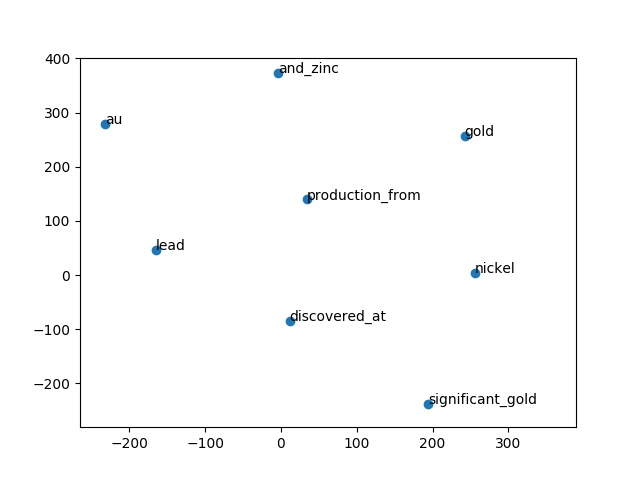

In [17]:
plt.figure(0)
display_closestwords_tsnescatterplot(model.wv, "gold")

In [18]:
tsne = TSNE(n_components=2)
print(type(model.wv.vocab))
X = model[model.wv.vocab]

<class 'dict'>


/home/wei/.conda/envs/Tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


<IPython.core.display.Javascript object>


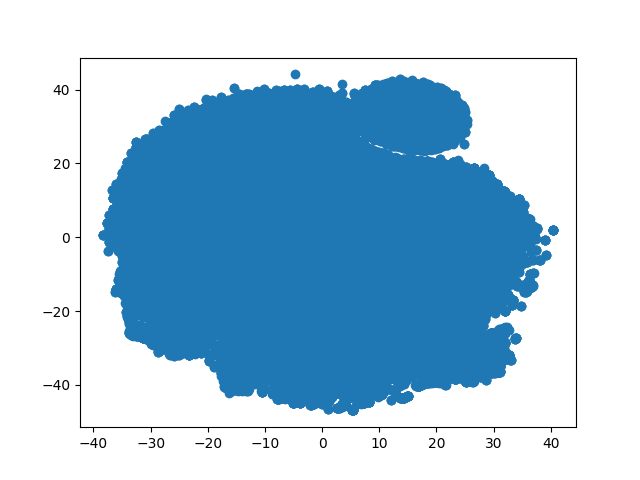

In [19]:
X_tsne = tsne.fit_transform(X)

plt.figure(1)
plt.rcParams['figure.figsize'] = [10, 10]
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

### Interactive Visualisation

Refer to https://www.datascience.com/resources/notebooks/word-embeddings-in-python, and also for ideas of incoporating POS and bigrams into word2vec training. 


In [20]:
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
from bokeh.plotting import figure, show
from bokeh.io import push_notebook, output_notebook
from bokeh.models import ColumnDataSource, LabelSet
import pandas as pd

In [21]:
def interactive_tsne(text_labels, tsne_array):
    '''makes an interactive scatter plot with text labels for each point'''

    # define a dataframe to be used by bokeh context
    bokeh_df = pd.DataFrame(tsne_array, text_labels, columns=['x','y'])
    bokeh_df['text_labels'] = bokeh_df.index

    # interactive controls to include to the plot
    TOOLS="hover, zoom_in, zoom_out, box_zoom, undo, redo, reset, box_select"

    p = figure(tools=TOOLS, plot_width=700, plot_height=700)

    # define data source for the plot
    source = ColumnDataSource(bokeh_df)

    # scatter plot
    p.scatter('x', 'y', source=source, fill_alpha=0.6,
              fill_color="#8724B5",
              line_color=None)

    # text labels
    labels = LabelSet(x='x', y='y', text='text_labels', y_offset=8,
                      text_font_size="8pt", text_color="#555555",
                      source=source, text_align='center')

    p.add_layout(labels)

    # show plot inline
    output_notebook()
    show(p)

<IPython.core.display.Javascript object>


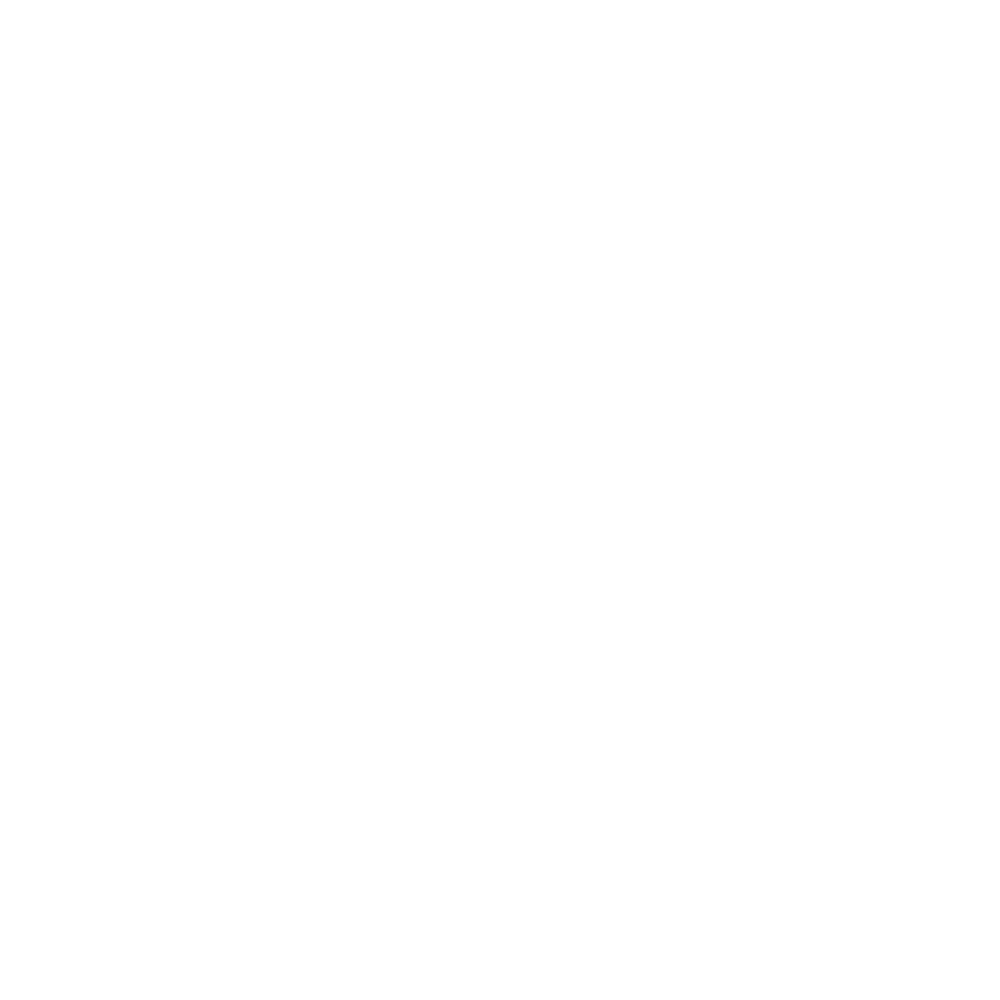

Loading BokehJS ...

In [22]:
plt.figure(3)
interactive_tsne(model.wv.vocab.keys(), X_tsne)